# Giới thiệu Google Colab

Colaboratory, viết tắt Colab, là sản phẩm từ Google Research. Colab cho phép người dùng viết và thực thi Python code trên browser và đặc biệt rất thích hợp với machine learning, phân tích dữ liệu và giáo dục. Một Colab Notebook tương tự như một file Jupyter Notebook được lưu trữ trên Google Drive và được thực thi trên Browser với những ưu điểm:
* Không cần cài đặt
* Sử dụng GPUs miễn phí
* Dễ dàng chia sẻ

Colab miễn phí sử dụng GPUs và không công bố chính thức giới hạn sử dụng do có nhiều yếu tố phụ thuộc như khoảng timeouts, loại GPU đang trống, vân vân. Resources miễn phí để tính toán thường rất dao động vào tuỳ thuộc từng thời điểm. Tối đa thời gian chạy là 12 giờ.

Các loại GPU hiện có của Colab: Nvidia K80s, T4s, P4s và P100s. Người dùng không có quyền lựa chọn loại GPU nào để kết nối với Colab Notebook của họ. Nếu muốn sử dụng dịch vụ tốt hơn và tự do lựa chọn loại GPU thì có thể tham khảo Colab Pro.

Hiện tại, Colab cũng có hỗ trợ TPU nhưng được khuyến cáo nên tránh sử dụng TPU khi không thực sự cần thiết vì một số hạn chế về mặt resources kể trên.

***Xem thêm***: [Hướng dẫn Kaggle](https://www.kaggle.com/nguyenhoa/kaggle-tutorial)

## Khởi tạo Colab Notebook

**Cách 1**:
* Truy cập vào đường link: https://colab.research.google.com/notebooks
* Sign in Google Colab bằng tài khoản Gmail của bạn
* Tạo Notebook mới bằng cách chọn `File` --> `New Notebook`

**Cách 2**:
* Từ Folder bạn muốn lưu trữ Colab Notebook trên Google Drive, chọn `New` --> (`More`) --> `Colaboratory`. Nếu chưa có `Colaboratory`, nhấn `Connect more apps` và tìm "Colaboratory" --> `Connect`.

<img src="https://i.imgur.com/sE7WPj5.png">

=> **Đổi tên** notebook ở góc trên cùng bên trái.

## Sử dụng GPUs

`Runtime` --> `Change runtime type`

`Hardware accelerator`: chọn `GPU`

<img src="https://i.imgur.com/tLD1U59.png">

Sau khi thay đổi `Hardware accelerator`, notebook đang chạy sẽ chuyển qua một session mới mà bạn có thể kiểm tra bằng cách:
`Runtime` --> `Manage sessions`

Kiểm tra xem GPU đã được kích hoạt hay chưa bằng cách:

In [ ]:
import tensorflow as tf
print("Số lượng GPU: ", len(tf.config.experimental.list_physical_devices('GPU')))

Số lượng GPU:  1


So sánh tốc độ tính toán của GPU và CPU

In [ ]:
import numpy as np
import time
a = np.random.rand(10000,10000)

with tf.device('/gpu:0'):
  start = time.time()
  tf.nn.softmax(a)
  print("Thời gian tính softmax cho ma trận a bằng GPU: ", time.time() - start)

with tf.device('/cpu:0'):
  start = time.time()
  tf.nn.softmax(a)
  print("Thời gian tính softmax cho ma trận a bằng CPU: ", time.time() - start)

Thời gian tính softmax cho ma trận a bằng GPU:  0.19167780876159668
Thời gian tính softmax cho ma trận a bằng CPU:  0.9392495155334473


## Mount Google Drive

Mount Google Drive vào Notebook để sử dụng dữ liệu lưu trên Drive và lưu trữ processed data từ Notebooks. Nếu bạn không lưu trên Drive, sau khi đóng Notebook, toàn bộ dữ lựu sẽ **KHÔNG** được lưu trữ lại.

Dữ liệu của Notebook nằm ở folder `/content`. Xem dữ liệu của Notebook trước khi mount Google Drive

In [ ]:
# Bất cứ Colab Notebook nào khi khởi tạo cũng có mặc định một folder sample_data
!ls /content

sample_data


In [ ]:
# Xem các dataset trong sample_data
!ls /content/sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


### Mount

Chạy code snippet bên dưới, copy `authorization code` và patse vào ô trống để mount drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


List nội dung bạn sẽ thấy có thêm một folder `drive` và đó là Google Drive của bạn.

In [ ]:
!ls /content

drive  sample_data


In [ ]:
# Xem các folder trên Google Drive của bạn
!ls -l /content/drive/My\ Drive | grep "^d"

drwx------ 2 root root      4096 Mar  8  2019 A2DS
drwx------ 2 root root      4096 Mar  9  2018 Algorithm Thinking
drwx------ 2 root root      4096 Apr  1  2019 APSIC 2019 - Tổng hợp bài báo cáo theo phiên
drwx------ 2 root root      4096 Jun 15  2018 Assignment3
drwx------ 2 root root      4096 Nov 26  2018 Colab Notebooks
drwx------ 2 root root      4096 Jul  3  2018 Conferences
drwx------ 2 root root      4096 May 21  2016 Conf_out
drwx------ 2 root root      4096 Jul  6  2016 Dr Eri Content
drwx------ 2 root root      4096 Dec 25  2016 GRs (1st anniversary)
drwx------ 2 root root      4096 Feb  4  2019 HealthyProject
dr-x------ 2 root root      4096 Jan  4  2019 H.E.C - Health for Every Child
drwx------ 2 root root      4096 Oct 22  2015 Học bổng Lê Tự Rô
dr-x------ 2 root root      4096 Jul  7  2018 Kalimba Vietnam Club's Free Tabs
drwx------ 2 root root      4096 Jun  4  2016 Khóa Luận
drwx------ 2 root root      4096 Dec 19  2018 Learn2Code
dr-x------ 2 root r

### Đọc | Lưu dữ liệu trên Google Drive

Để đọc và lưu dữ liệu trên Google Drive, bạn chỉ cần truyền `path` đến folder trên drive của bạn. Mặc định khi mount, `root folder` cuả Drive bạn là `"/content/drive/My Drive"`

Ví dụ: Tìm một tấm ảnh trong `folder` trên Google Drive và plot lên, nếu không có ảnh trên trong `folder` thì hiện thông báo.

In [ ]:
# Thay đổi đường link tới folder trên drive của bạn, nếu không thì mặc định là `root` folder trên Drive của bạn
folder = "."

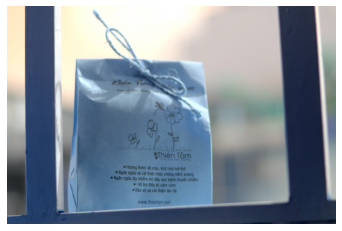

In [ ]:
# Import dependencies
import os
import cv2
import matplotlib.pyplot as plt

files = next(os.walk(os.path.join("/content/drive/My Drive",folder)))[2]
ext = ["jpg","png","jpeg"]
imgs = [x for x in files if x.split(".")[-1].lower() in ext]
if len(imgs) == 0:
  print("Không có ảnh trong folder {} trên Drive".format(folder))
else:
  im = cv2.imread(os.path.join("/content/drive/My Drive","{}/{}".format(folder,imgs[0])))
  plt.imshow(im)
  plt.axis("off")

Ở ví dụ trên bạn cũng thấy được rằng bạn đã sử dụng thư viên `cv2` và `matplotlib` mà không cần install. Ưu điểm đó là do Colab đã tích hợp các thư viện phổ biến và người dùng không cần phải install thêm. Trong trường hợp bạn import mà bị báo `module not found`, từ cell của Notebook, bạn có thể sử dụng `!pip install <tên_thư_viện>` để install.

## Upload file lên Colab


Sử dụng code sau để upload file lên Colab Notebook.

In [ ]:
from google.colab import files
files.upload();

Saving Deep_Learning_with_Python.pdf to Deep_Learning_with_Python.pdf


Trong ví dụ trên mình đã upload một file pdf có tên là `Deep_Learning_with_Python.pdf` lên, bây giờ mình sẽ list để kiểm tra xem file đã được up lên chưa.

In [ ]:
!ls /content/

Deep_Learning_with_Python.pdf  drive  sample_data


Lưu ý rằng, file này sẽ biến mất nếu bạn đóng Notebook hoặc quá thời gian chạy của một session, để lưu file này cho những lần sử dụng khác trong tương lai, bạn nên move vào drive.

## Kaggle APIs

Để biết về Kaggle, bạn xem thêm tài liệu này: [Hướng dẫn Kaggle](https://www.kaggle.com/nguyenhoa/kaggle-tutorial)

Ngoài những tính năng kể trong file `Hướng dẫn Kaggle`, Kaggle còn cung cấp APIs để người dùng có thể download dữ liệu từ các bộ dataset hoặc cuộc thi của Kaggle về để sử dụng.

Nếu data bạn muốn sử dụng nằm trên Kaggle, từ Colab Notebook bạn có thể sử dụng Kaggle APIs để download dữ liệu trực tiếp vào Colab hay Google Drive.

**B1: Tạo API key**

Trên Kaggle `My Account` (Click Avatar ở góc trên cùng bên phải --> `My Account`. Chọn `Create New API Token`. Lưu file kaggle.json về máy. (Không share file này cho người khác)

**B2: Upload file kaggle.json lên Colab**

In [ ]:
files.upload();

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

**B3: Sử dụng kaggle api**

Để biết thêm về cách sử dụng: https://github.com/Kaggle/kaggle-api

In [ ]:
# List competitions
!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       2966           False  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      21866            True  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       5052            True  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        400           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       2062           False  
competitive-data-science-predict-future-sales     2020-12-31 23:59:00  Playground           Kudos       6784   

In [ ]:
# List dataset
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    2GB  2020-05-13 22:21:42          67048  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          142MB  2020-04-29 22:47:23           9061  
mrmorj/political-advertisements-from-facebook               Political Advertisements from Facebook              237MB  2020-05-05 18:53:51            154  
amanarora/obesity-among-adults-by-country-19752016          Obesity among adults by country, 1975-2016          362KB  2020-05-08 07:40:50            923  
jessemostipak/animal-crossing                               Anim

In [ ]:
# Download dataset
!kaggle datasets download roche-data-science-coalition/uncover

 97% 137M/142M [00:02<00:00, 39.6MB/s]
100% 142M/142M [00:02<00:00, 61.5MB/s]


In [ ]:
# List để xem các files được download
!ls .

Deep_Learning_with_Python.pdf  drive  sample_data  uncover.zip


In [ ]:
# Delete .kaggle folder if you don't use any more
!rm -rf /root/.kaggle/

Khi download từ competitions, có thể bạn cần phải Join Competition đó và chấp thuận những quy định cuộc thi trên Kaggle thì bạn mới download được data.

# Tham Khảo
1. [Welcome To Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#)
2. [Colab Frequently Asked Questions](https://research.google.com/colaboratory/faq.html#resource-limits)
3. [Kaggle APIs](https://github.com/Kaggle/kaggle-api)